In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
import joblib
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('train_cleaned.csv')
test_df = pd.read_csv('test_cleaned.csv')

In [3]:
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,CustomerID,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,-1.169131,-0.331703,-1.012550,1.445777,-0.568906,-1.005712,-0.715179,-0.175519,-1.253786,CB6SXPNVZA,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-0.089945,-1.690423,-0.871303,1.062671,-1.317459,-0.450971,0.411960,1.216976,1.526687,S7R2G87O09,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.376731,-0.088741,0.254353,-1.165718,-0.691019,-0.104258,1.069988,0.520728,-1.531833,EASDC20BDT,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.819125,-1.207816,-0.990879,0.663322,0.777613,0.381141,1.102179,-0.871766,1.665711,NPF69NT69N,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.089945,1.031143,0.412150,-0.037246,-0.928765,-0.312285,0.531014,-0.175519,-1.670857,4LGYPK7VOL,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4]:
X_train = train_df.drop(columns=["Churn", "CustomerID"], axis=1) 
y_train = train_df["Churn"]

In [5]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
model = Sequential(
    [
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ]
)

c:\Users\santi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])

In [8]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_auc', save_best_only=True, mode='max')
]

history = model.fit(X_train, y_train,
                    validation_data=(X_test_split, y_test_split),
                    epochs=50,
                    batch_size=64,
                    callbacks=callbacks)

Epoch 1/50
3810/3810 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - AUC: 0.6765 - accuracy: 0.7801 - loss: 0.4896 - val_AUC: 0.7527 - val_accuracy: 0.8222 - val_loss: 0.4103
Epoch 2/50
  76/3810 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - AUC: 0.7440 - accuracy: 0.8110 - loss: 0.4273

c:\Users\santi\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_auc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


3810/3810 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.7386 - accuracy: 0.8220 - loss: 0.4175 - val_AUC: 0.7537 - val_accuracy: 0.8259 - val_loss: 0.4090
Epoch 3/50
3810/3810 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.7422 - accuracy: 0.8223 - loss: 0.4160 - val_AUC: 0.7535 - val_accuracy: 0.8240 - val_loss: 0.4094
Epoch 4/50
3810/3810 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUC: 0.7417 - accuracy: 0.8216 - loss: 0.4175 - val_AUC: 0.7543 - val_accuracy: 0.8252 - val_loss: 0.4092
Epoch 5/50
3810/3810 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.7435 - accuracy: 0.8214 - loss: 0.4165 - val_AUC: 0.7545 - val_accuracy: 0.8252 - val_loss: 0.4088
Epoch 6/50
3810/3810 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.7470 - accuracy: 0.8235 - loss: 0.4124 - val_AUC: 0.7548 - val_accuracy: 0.8253 - val_loss: 0.4083
Epoch 7/50
3810/3810 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.7430 - accuracy: 0.8224 - loss: 0.4151 - val_AUC: 0.7549 - val_accuracy: 0.8243 - val_loss: 0.4084
Epoch 8/50
3810/3810 ━━━━━━━━━━━━━━━━━

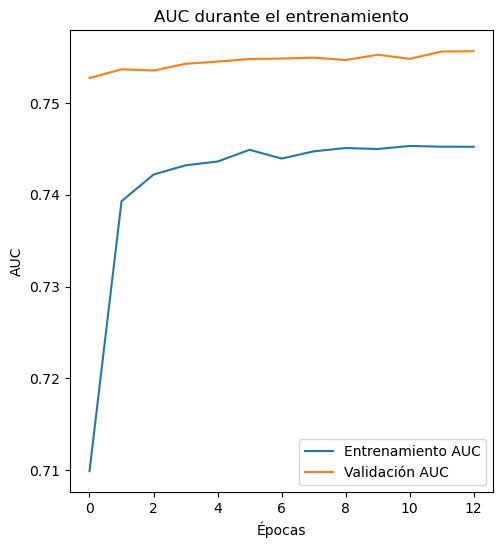

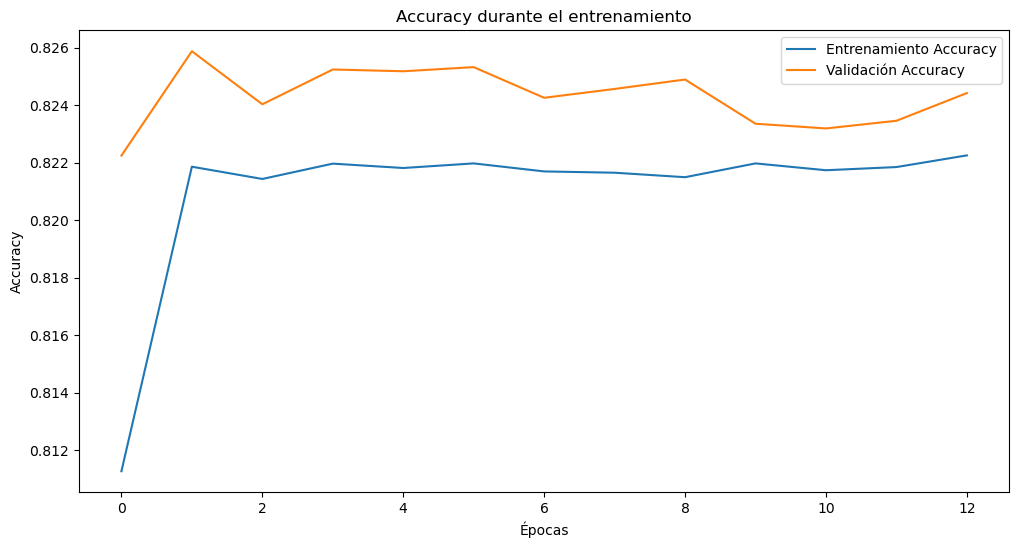

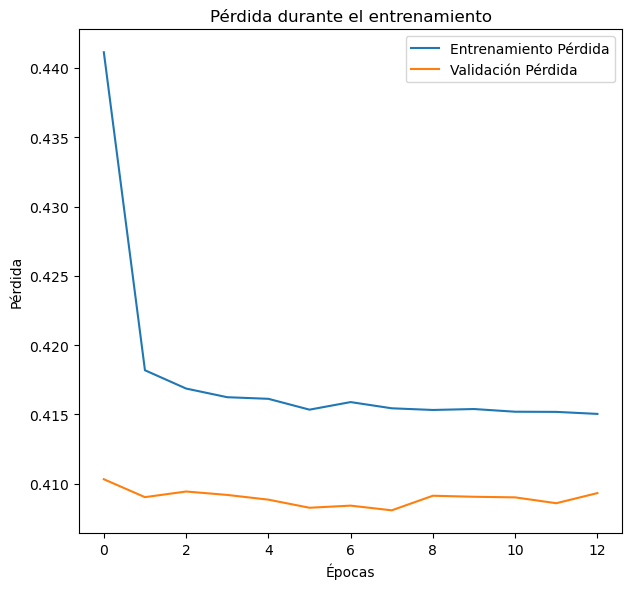

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['AUC'], label='Entrenamiento AUC')
plt.plot(history.history['val_AUC'], label='Validación AUC')
plt.title('AUC durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('AUC')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Entrenamiento Accuracy')
plt.plot(history.history['val_accuracy'], label='Validación Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento Pérdida')
plt.plot(history.history['val_loss'], label='Validación Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
test_loss, test_accuracy, test_auc = model.evaluate(X_test_split, y_test_split)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.7551 - accuracy: 0.8235 - loss: 0.4092
Test Loss: 0.408069908618927
Test Accuracy: 0.7549472451210022
Test AUC: 0.824562132358551


In [37]:
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [38]:
assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [39]:
assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [40]:
assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'